<a href="https://colab.research.google.com/github/varssha01/CS19P18-DLC-210701325/blob/main/Expt4_210701325.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
from tkinter import *
import tkinter as tk
#import win32gui
from PIL import ImageGrab, Image

In [ ]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28) (60000,)
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [ ]:
batch_size = 128
num_classes = 10
epochs = 15
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))AA
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])
hist = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
print("The model has successfully trained")
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
model.save('mnist.h5')
print("Saving the model as mnist.h5")

Epoch 1/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 60s 124ms/step - accuracy: 0.0946 - loss: 2.3087 - val_accuracy: 0.1088 - val_loss: 2.2966
Epoch 2/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 76s 111ms/step - accuracy: 0.1050 - loss: 2.2967 - val_accuracy: 0.1152 - val_loss: 2.2854
Epoch 3/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 112ms/step - accuracy: 0.1209 - loss: 2.2863 - val_accuracy: 0.1149 - val_loss: 2.2749
Epoch 4/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 114ms/step - accuracy: 0.1315 - loss: 2.2772 - val_accuracy: 0.1229 - val_loss: 2.2648
Epoch 5/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 53s 113ms/step - accuracy: 0.1469 - loss: 2.2682 - val_accuracy: 0.1488 - val_loss: 2.2542
Epoch 6/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 115ms/step - accuracy: 0.1582 - loss: 2.2590 - val_accuracy: 0.1873 - val_loss: 2.2430
Epoch 7/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 80s 111ms/step - accuracy: 0.1770 - loss: 2.2493 - val_accuracy: 0.2393 - val_loss: 2.2305
Epoch 8/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 80s 108ms/step - accuracy: 0.1970 - loss: 2

Test loss: 2.0644009113311768
Test accuracy: 0.6110000014305115
Saving the model as mnist.h5


In [ ]:
model = load_model('mnist.h5')
def predict_digit(img):
    #resize image to 28x28 pixels
    img = img.resize((28,28))
    #convert rgb to grayscale
    img = img.convert('L')
    img = np.array(img)
    img = img.reshape(1,28,28,1)
    img = img/255.0
    img = 1 - img
    #predicting
    res = model.predict([img])[0]
    return np.argmax(res), max(res)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predicted Digit: 7
Confidence: 0.13


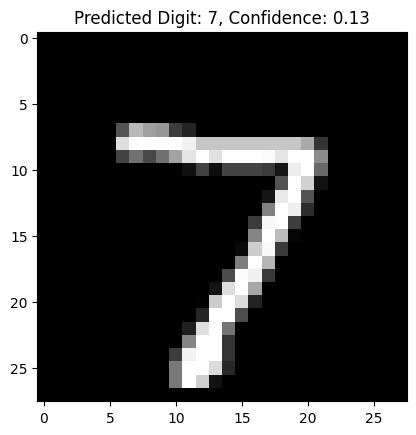

In [ ]:
import matplotlib.pyplot as plt

# Use an image from the MNIST test dataset
test_image_array = x_test[0]  # Change the index to use different images from the test set
test_image_pil = Image.fromarray((test_image_array.squeeze() * 255).astype(np.uint8))

# Predict the digit in the image
predicted_digit, confidence = predict_digit(test_image_pil)

# Print the results
print(f"Predicted Digit: {predicted_digit}")
print(f"Confidence: {confidence:.2f}")

# Show the test image
plt.imshow(test_image_array.squeeze(), cmap='gray')
plt.title(f"Predicted Digit: {predicted_digit}, Confidence: {confidence:.2f}")
plt.show()